In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import calliope
import yaml

In [3]:
with open('model_config/miso_techs.yaml', 'r') as file:
    tech_data = yaml.load(file, Loader=yaml.SafeLoader)['techs']

In [4]:
model_run = 6
model = calliope.read_netcdf(f"../calliope_model/results/0{model_run}_res.nc")

In [5]:
ds = model.results

In [6]:
ds

<xarray.Dataset>
Dimensions:                                 (loc_techs: 7,
                                             loc_tech_carriers_prod: 6,
                                             timesteps: 8760,
                                             loc_tech_carriers_con: 1,
                                             costs: 1, loc_techs_cost: 6,
                                             loc_techs_area: 2,
                                             ...
                                             loc_techs_investment_cost: 6,
                                             loc_carriers: 1,
                                             loc_techs_cost_investment_constraint: 6,
                                             loc_carriers_system_balance_constraint: 1,
                                             loc_techs_balance_demand_constraint: 1,
                                             carriers: 1, techs: 7)
Coordinates: (12/16)
  * techs                                   (techs) object 'ccgt' ... 'wind'
  * costs                                   (costs) object 'monetary'
  * loc_carriers                            (loc_carriers) object 'region1::p...
  * loc_carriers_system_balance_constraint  (loc_carriers_system_balance_constraint) object ...
  * loc_tech_carriers_con                   (loc_tech_carriers_con) object 'r...
  * loc_tech_carriers_prod                  (loc_tech_carriers_prod) object '...
    ...                                      ...
  * loc_techs_cost_investment_constraint    (loc_techs_cost_investment_constraint) object ...
  * loc_techs_investment_cost               (loc_techs_investment_cost) object ...
  * loc_techs_om_cost                       (loc_techs_om_cost) object 'regio...
  * loc_techs_supply_plus                   (loc_techs_supply_plus) object 'r...
  * timesteps                               (timesteps) datetime64[ns] 2023-0...
  * carriers                                (carriers) object 'power'
Data variables: (12/18)
    energy_cap                              (loc_techs) float64 0.0 0.0 ... 0.0
    carrier_prod                            (loc_tech_carriers_prod, timesteps) float64 ...
    carrier_con                             (loc_tech_carriers_con, timesteps) float64 ...
    cost                                    (costs, loc_techs_cost) float64 0...
    resource_area                           (loc_techs_area) float64 0.0 0.0
    resource_con                            (loc_techs_supply_plus, timesteps) float64 ...
    ...                                      ...
    system_balance                          (loc_carriers_system_balance_constraint, timesteps) float64 ...
    required_resource                       (loc_techs_balance_demand_constraint, timesteps) float64 ...
    capacity_factor                         (timesteps, loc_tech_carriers_prod) float64 ...
    systemwide_capacity_factor              (carriers, techs) float64 nan ......
    systemwide_levelised_cost               (carriers, costs, techs) float64 ...
    total_levelised_cost                    (carriers, costs) float64 nan
Attributes:
    termination_condition:     optimal
    objective_function_value:  0.0
    solution_time:             13.793219
    time_finished:             2024-03-25 13:47:17
    calliope_version:          0.6.10
    applied_overrides:         
    scenario:                  None
    defaults:                  carrier_ratios:\ncharge_rate:\nenergy_cap_per_...
    allow_operate_mode:        1
    model_config:              calliope_version: 0.6.10\nname: MISO Single Re...
    run_config:                backend: pyomo\nbigM: 1000000.0\ncyclic_storag...

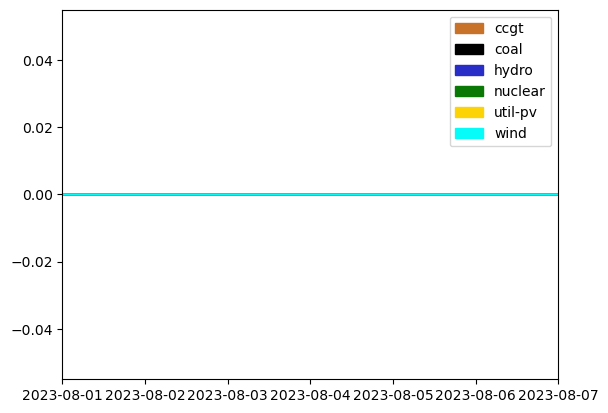

In [7]:
fig, ax = plt.subplots()
total = np.zeros(8760)
for i, tech in enumerate(tech_data):
    color = tech_data[tech]['essentials']['color']
    if tech == "demand_power":
        continue
    else:
        data = ds.carrier_prod.sel(loc_tech_carriers_prod=f'region1::{tech}::power')
        ax.fill_between( 
                        x=data.timesteps.values, 
                        y1=total, 
                        y2=total+data.values, 
                        label=tech, 
                        color=color,)
        total += data.values
ax.legend()
month = '08'
ax.set_xlim(pd.Timestamp(f'2023-{month}-01'), pd.Timestamp(f'2023-{month}-07'))
plt.show()

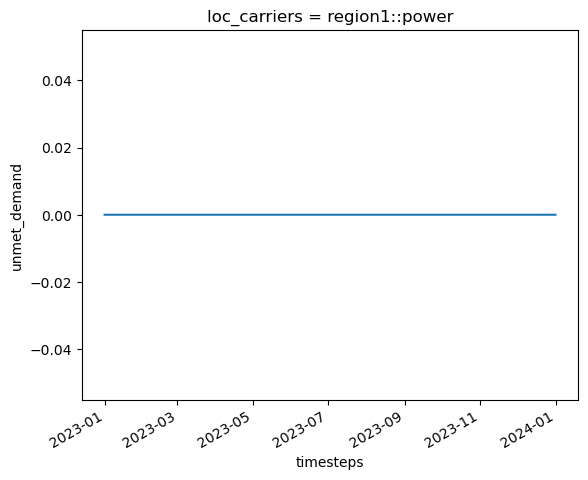

In [11]:
ds.unmet_demand.sel(loc_carriers="region1::power").plot()

In [25]:
ds.carrier_prod.sel(loc_tech_carriers_prod='region1::util-pv::power').values

array([  1.,   0.,   1., ..., 825., 541., 152.])

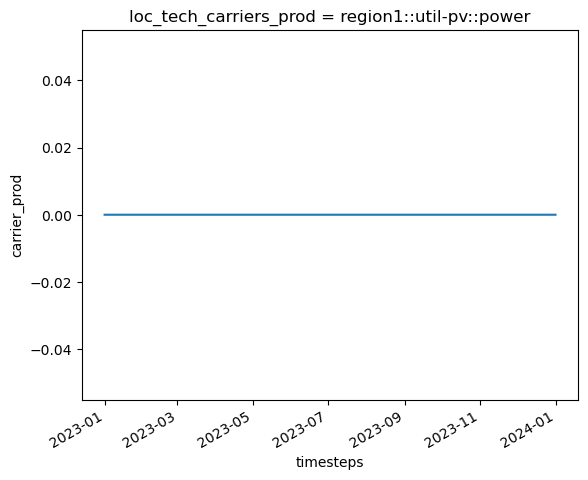

In [8]:
ds.carrier_prod.sel(loc_tech_carriers_prod='region1::util-pv::power').plot()

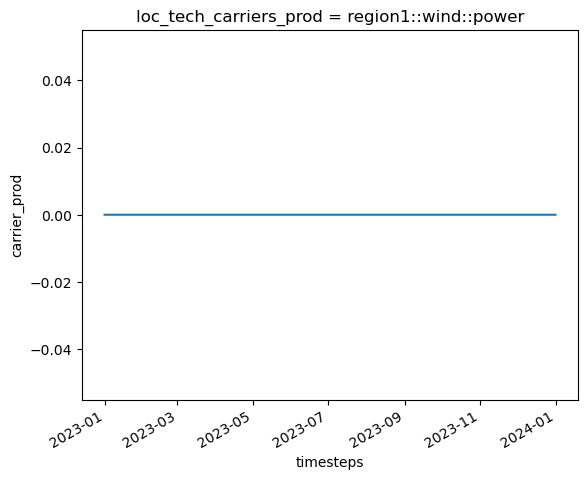

In [9]:
ds.carrier_prod.sel(loc_tech_carriers_prod="region1::wind::power").plot()